In [109]:
%pylab inline
from scipy.integrate import quad
from scipy.misc import derivative

Populating the interactive namespace from numpy and matplotlib


In [110]:
data = loadtxt("../data/camb_linear_matterpower_z0.dat")
k = data[:,0]
P_k = data[:,1]

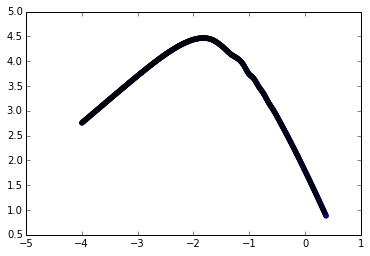

In [111]:
scatter(log10(k), log10(P_k))

How to compute the P-M.
1. Compute the sigma.
$\sigma_{\Delta}^2 = \dfrac{4\pi}{(2\pi)^{3/2}} \int k^2 P(k) |W_{k}(k)|^2$

2. Normalize using: $\sigma_8 = \sigma_{\Delta}(R = 8Mpc/h) = 0.813$

3. Derivate to find

$n(M)dM = \sqrt{\dfrac{2}{\pi} }\dfrac{\bar{\rho}}{M^2} \dfrac{\delta_c}{\sigma_M} exp \left [ \dfrac{-\delta_c^2}{2 \sigma_M^2} \right ] | \dfrac{dln\sigma_{M}}{dlnM}|dM$

In [197]:
# Window function W_R(x)

def W(r, k):
    Wk = 3 * (sin(k*r)- k*r*cos(k*r))/ (k*r)**3
    return Wk
def P_k(k):
    n = 1.0
    a = 6.4
    b = 3.0
    c = 1.7
    nu = 1.13
    Gamma = 0.21
    A = 1
    P = A * k**n / (1 + ( (a*k/Gamma) + (b*k/Gamma)**(3/2.) + (c*k/Gamma)**2 )**nu ) ** (1/nu)
    return P

In [198]:
k = linspace(0, 500, 50)
Wk = W(10, k)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


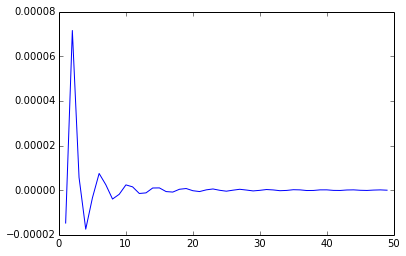

In [199]:
plot(Wk)

In [200]:
def sigma(x, r):
    Pk = P_k(x)
    Wk = W(r,x)
    return x**2.*Pk*abs(Wk)**2

In [201]:
r = 8
f = quad(sigma, 0, inf, args=r)
print f
Sigmad2 =  4*pi / (2.*pi)**(3/2.) * f[0]
Sigmad = sqrt(Sigmad2)
print Sigmad2, Sigmad

sigma8 = 0.817
print Sigmad
A =  sqrt(sigma8**2 / Sigmad2)

print A

(0.00010541599268797837, 1.3738326392199262e-08)
8.41097930274e-05 0.00917113913467
0.00917113913467
89.0838082383


# Computing $\bar \rho_{vir}$

We have from EdS model that we have that $\Delta_{vir} = 176.652$ and $\rho_{vir} = 24152.821 M_{\odot} / kpc^3$


In [169]:
def rhomv(rho, Delta):
    rhomv = rho/(Delta + 1)
    return rhomv

In [308]:
rhomv(24152.821, 176.652)
M = 4/3. * (8000./0.7)**3 * 135.9
print M 

2.70479300292e+14


# The derivative term:
can be expressed as $| \dfrac{dln\sigma_M}{dlnM}| = |\dfrac{M}{\sigma} \dfrac{d\sigma_M}{dM}| $ 

In [215]:
def f(k, M):
    n = 1.0
    a = 6.4
    b = 3.0
    c = 1.7
    nu = 1.13
    Gamma = 0.21
    A = 89.08
    rhom = 135.055
    r = (3*M / (4*pi*rhom) )**(1/3.)
    Wk = 3 * (sin(k*r)- k*r*cos(k*r))/ (k*r)**3
    P = A * k**n / (1 + ( (a*k/Gamma) + (b*k/Gamma)**(3/2.) + (c*k/Gamma)**2 )**nu ) ** (1/nu)
    f = k**2 * P * abs(Wk)**2
    f1 = sqrt(4*pi / (2*pi**(3/2.)) * f )
    return f1

In [287]:
def sigma1(M):
    I = quad(f, 0, inf, args=M)
    return I[0]

In [288]:
sigma1(10**12)

In [296]:
sigmafunc = zeros(10000)
M = logspace(10, 15,10000)
for i in range(len(M)):
    sigmafunc[i] = log10(sigma1(M[i]))

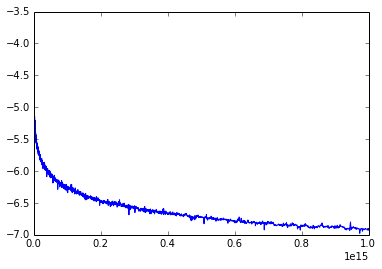

In [297]:
#index = where(M == nan)
#M1 = M(index)
#sigmafunc1 = sigmafunc(index)
plot(M, sigmafunc)

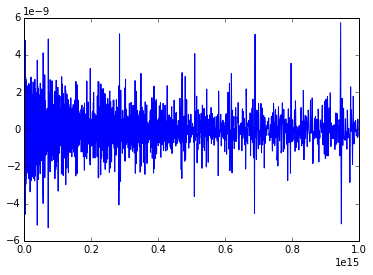

In [300]:
h = M[1] - M[0]
f_prime_diff = (sigmafunc[2:-1] - sigmafunc[0:-3])/(2*h)
plot(M[1:-2], f_prime_diff)

In [ ]:
M = logspace(10, 15, 10000)
rmv = rhomv(24152.821, 176.652)
Mddd = []
for i in range(len(M)):
    Mdnm = sqrt(2 / pi) * rmv / M[i] * 1.68 / sigma1(M[i]) * exp(-sigma1(M[i])**2 / 1.68**2) * log10(sigma1(M[i])) / log10(M[i])
    Mddd.append(Mdnm)
plot(M, Mddd)
    

In [10]:
from sympy import init_printing, integrate, Symbol, exp, cos, erf, sin
init_printing()
x = Symbol('x')
R = Symbol('R')
A = Symbol('A')
n = Symbol('n')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
g = Symbol('g')
m = Symbol('m')
init_printing()

In [11]:
f = abs( 3/ (x*R) * sin(x*R) - x*R*cos(x*R) )**2 * x**2 * A * x**n / ( 1 + ( (a*x/g) + (b*x/g)**(3/2.) + (c*x/g)**2 )**m )**(1/m)

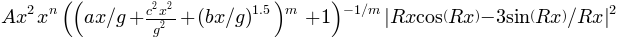

In [12]:
f